# Load Packages 

In [1]:
Threads.nthreads()

6

In [2]:
using Plots
using Clustering
using ParallelKMeans
using Random
using BenchmarkTools
using DelimitedFiles

In [3]:
# Read same data as constructed by Sklearn
X = DelimitedFiles.readdlm("data.csv", ',', Float64);

In [4]:
size(X)

(1000000, 30)

In [5]:
# Read same data as transposed matrix since Julia is column major
X = permutedims(X);

In [6]:
size(X)

(30, 1000000)

## Benchmark Clustering

In [7]:
@benchmark [Clustering.kmeans(X, i, tol=1e-4, maxiter=300).totalcost for i = 2:10] samples=7 seconds=300

BenchmarkTools.Trial: 
  memory estimate:  17.53 GiB
  allocs estimate:  16166
  --------------
  minimum time:     291.953 s (0.65% GC)
  median time:      292.398 s (0.66% GC)
  mean time:        292.398 s (0.66% GC)
  maximum time:     292.844 s (0.66% GC)
  --------------
  samples:          2
  evals/sample:     1

In [18]:
a = [Clustering.kmeans(X, i, tol=1e-4, maxiter=300).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.4375150969720366e6
 2.3995298444469925e6
 2.368994342188604e6 
 2.346371505910781e6 
 2.3269183524640095e6
 2.3098382995979954e6
 2.2938555364349186e6
 2.2806820539198956e6
 2.2685839877775386e6

## Benchmark ParallelKmeans Single-Thread

In [8]:
@benchmark [ParallelKMeans.kmeans(X, i, ParallelKMeans.SingleThread(),
            tol=1e-4, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=300

BenchmarkTools.Trial: 
  memory estimate:  206.06 MiB
  allocs estimate:  334
  --------------
  minimum time:     9.340 s (0.10% GC)
  median time:      9.678 s (0.11% GC)
  mean time:        9.793 s (0.13% GC)
  maximum time:     10.198 s (0.09% GC)
  --------------
  samples:          7
  evals/sample:     1

In [19]:
b = [ParallelKMeans.kmeans(X, i, ParallelKMeans.SingleThread(),
        tol=1e-4, max_iters=300, verbose=false).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.44645199938185e6  
 2.4098993089682357e6
 2.3811081586253284e6
 2.3566893514152938e6
 2.337820720632962e6 
 2.3201380636561294e6
 2.304597270266214e6 
 2.290158490407513e6 
 2.2775354498396353e6

## Benchmark ParallelKMeans Multi-Thread

In [9]:
@benchmark [ParallelKMeans.kmeans(X, i, ParallelKMeans.MultiThread(),
            tol=1e-4, max_iters=300, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=300

BenchmarkTools.Trial: 
  memory estimate:  206.55 MiB
  allocs estimate:  5792
  --------------
  minimum time:     2.556 s (0.41% GC)
  median time:      2.730 s (0.38% GC)
  mean time:        2.739 s (0.52% GC)
  maximum time:     3.022 s (0.88% GC)
  --------------
  samples:          7
  evals/sample:     1

In [16]:
c = [ParallelKMeans.kmeans(X, i, ParallelKMeans.MultiThread(), 
        tol=1e-4, max_iters=300, verbose=false).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.4463499895797316e6
 2.409820697525633e6 
 2.3812280762306876e6
 2.3577025215585227e6
 2.3375881154106585e6
 2.320181588032561e6 
 2.3044574000313752e6
 2.2902189432259984e6
 2.2774200612048907e6

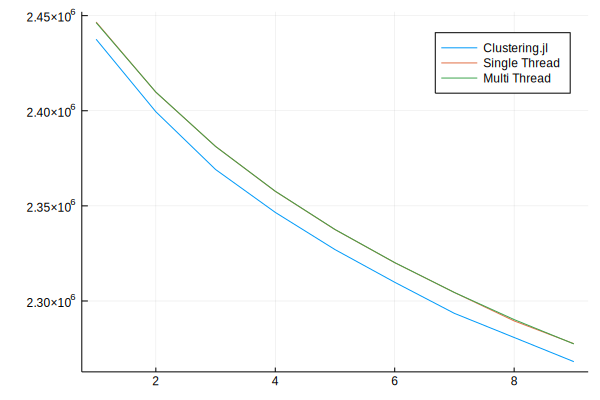

In [17]:
plot(a, label="Clustering.jl")
plot!(b, label="Single Thread")
plot!(c, label="Multi Thread")